# Distributions

## 확률질량함수

### empirical distribution

In [1]:
from empiricaldist import Pmf

coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [2]:
die = Pmf.from_seq(range(1, 7))
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [3]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [4]:
letters['s']

0.36363636363636365

In [5]:
letters('s')

0.36363636363636365

In [6]:
letters('x')

0

In [7]:
die([1, 4, 7])

array([0.16666667, 0.16666667, 0.        ])

## 쿠키 문제

* $B_1$ : 바닐라 $V$ 30개, 초코 $C$ 10개 
* $B_2$ : 바닐라 $V$ 20개, 초코 $C$ 10개

prior distribution

In [8]:
prior = Pmf.from_seq(['B1', 'B2'])
prior

,probs
B1,0.5
B2,0.5


In [9]:
likelihood_vanilla = [3/4, 1/2]
likelihood_chocolate = [1/4, 1/2]
posterior = prior * likelihood_vanilla # 바닐라를 뽑은 경우 업데이트
posterior

,probs
B1,0.375
B2,0.250


posterior distribution

In [10]:
posterior.normalize()
posterior

,probs
B1,0.6
B2,0.4


In [11]:
posterior('B1')

0.6

바닐라를 다시 뽑았을때

In [12]:
posterior *= likelihood_vanilla # 또 바닐라를 뽑은 경우 업데이트
posterior.normalize()
posterior

,probs
B1,0.692308
B2,0.307692


초코를 뽑았을 경우 업데이트

In [13]:
posterior *= likelihood_chocolate # 초콜릿을 뽑은 경우 업데이트
posterior.normalize()
posterior

,probs
B1,0.529412
B2,0.470588


## 101 Bowls

* Bowl 0는 0% 바닐라, 100% 초코
* Bowl 1는 1% 바닐라, 99% 초코
* Bowl 2는 2% 바닐라, 98% 초코 

...

* Bowl 99는 99% 바닐라, 1% 초코
* Bowl 100는 100% 바닐라, 0% 초코


In [14]:
import numpy as np

hypos = np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [15]:
prior = Pmf(1, hypos) # 사전확률 1, 수량 hypos
prior.normalize() # prob_data

101

In [16]:
prior # 1/101 사전확률

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [17]:
likelihood_vanilla = hypos / 100
likelihood_vanilla

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [18]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


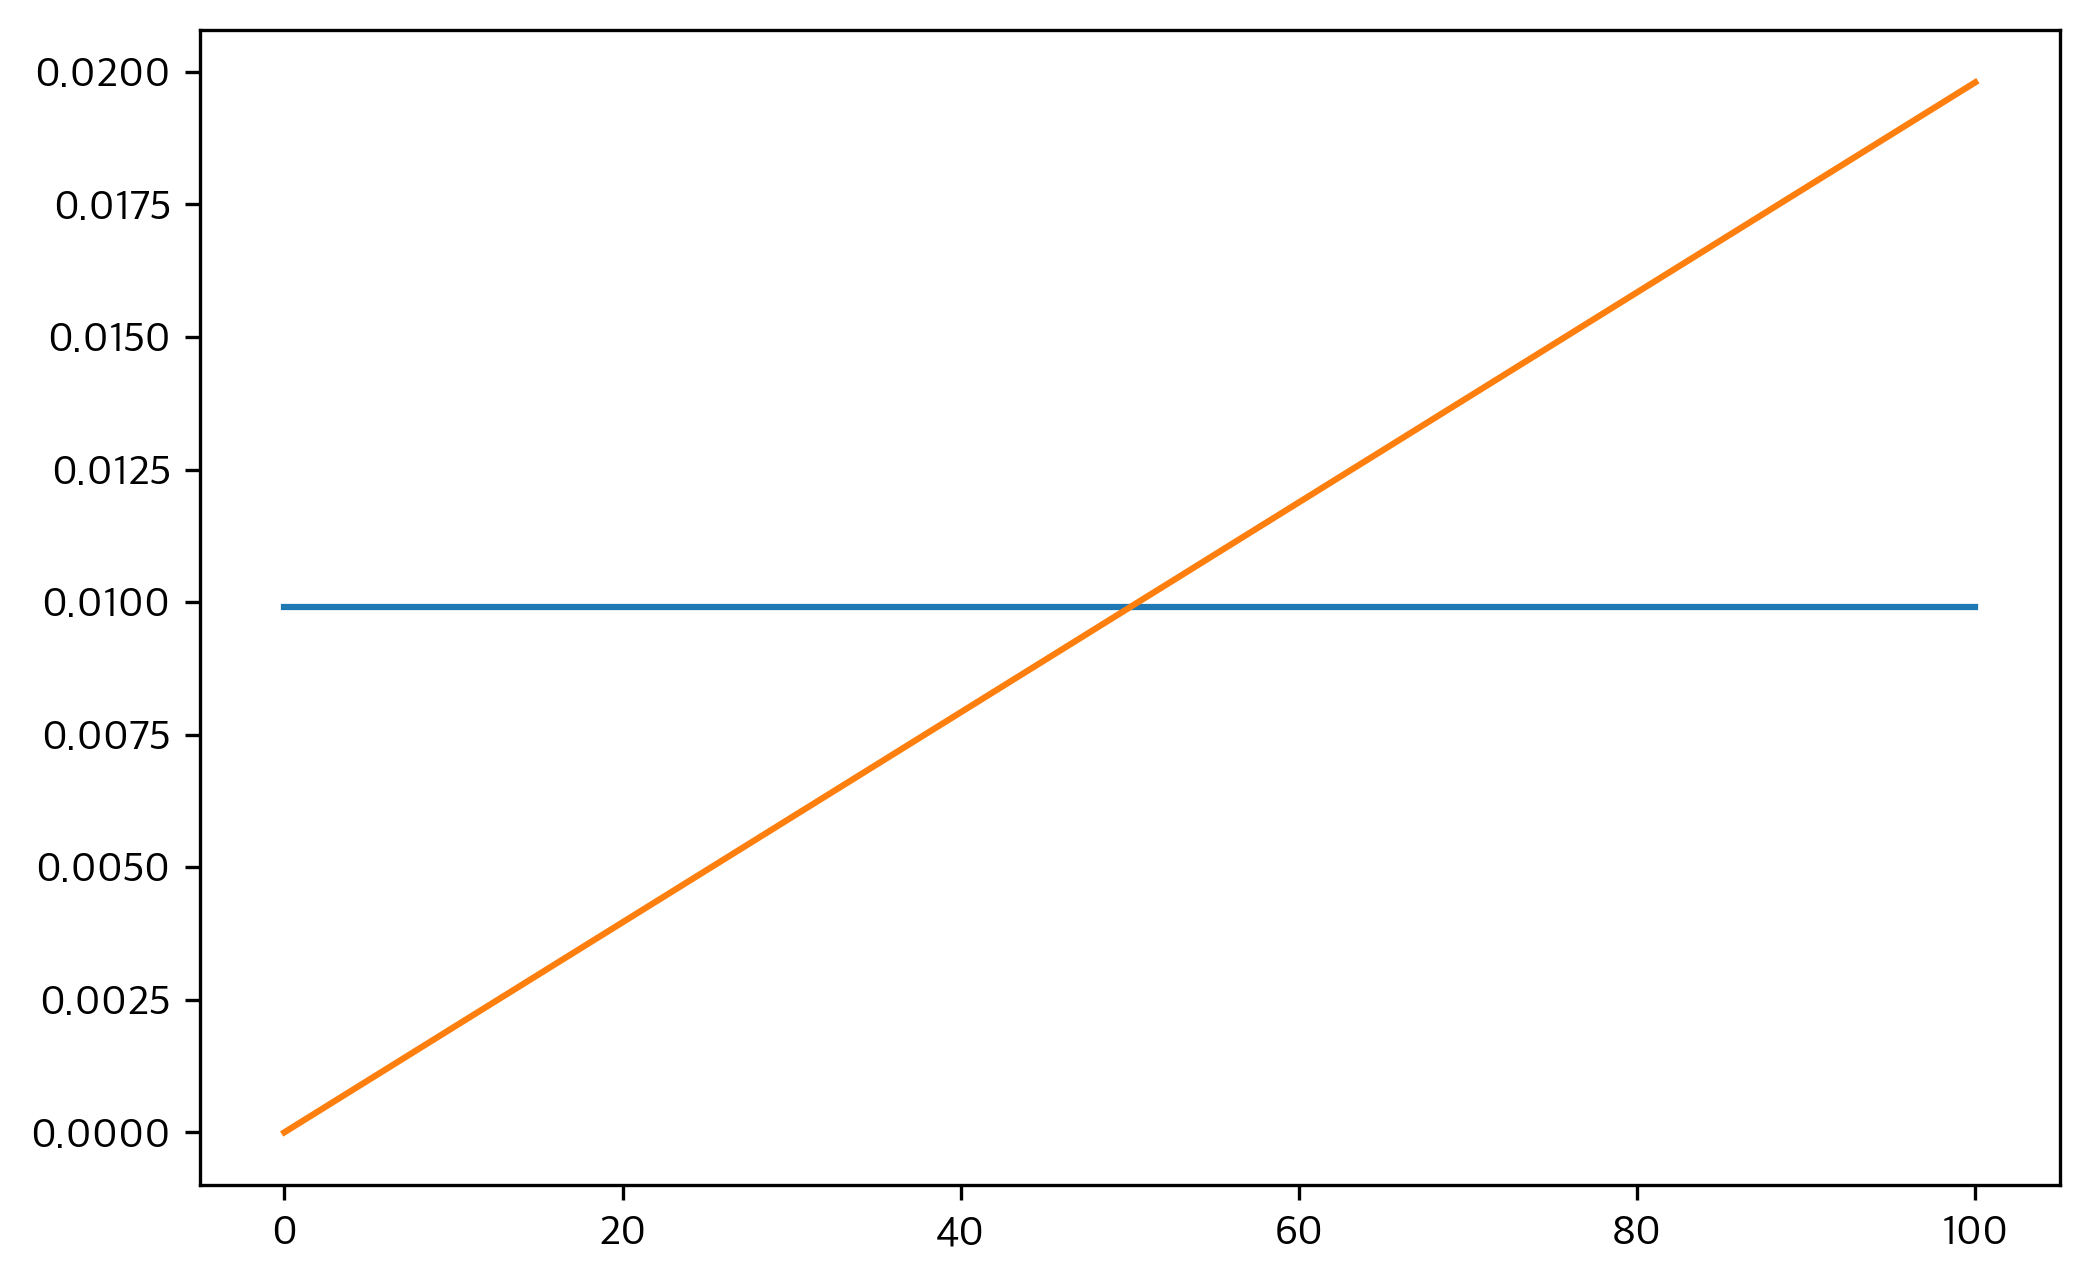

In [19]:
import matplotlib.pyplot as plt

plt.plot(prior)
plt.plot(posterior1)

In [20]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior2

,probs
0,0.000000
1,0.000003
2,0.000012
3,0.000027
4,0.000047
...,...
96,0.027238
97,0.027808
98,0.028385
99,0.028967


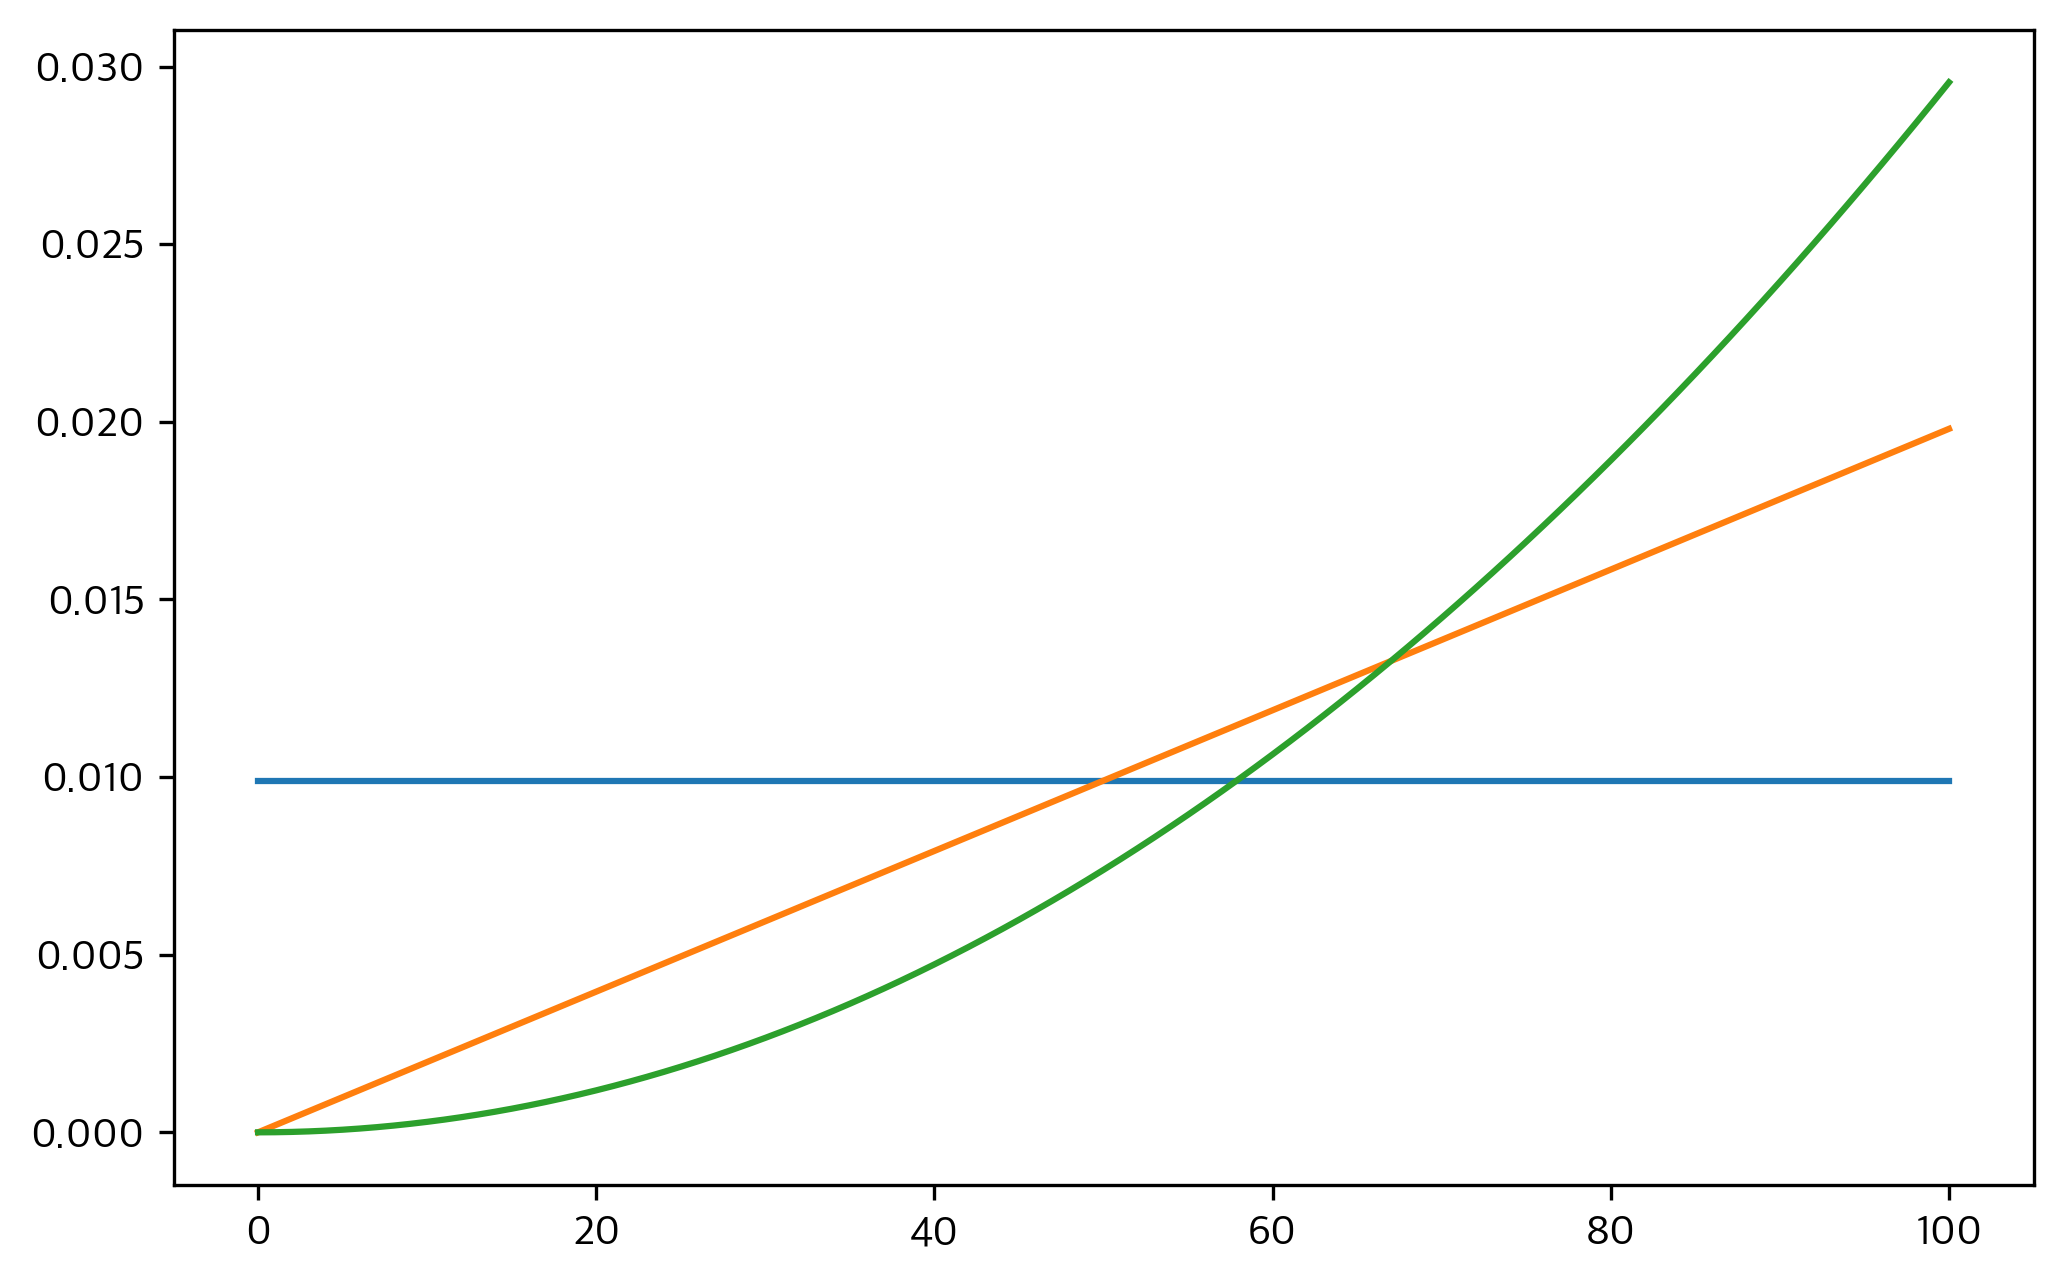

In [21]:
plt.plot(prior)
plt.plot(posterior1)
plt.plot(posterior2)

In [22]:
likelihood_chocolate = 1 - likelihood_vanilla
likelihood_chocolate

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

In [23]:
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior3

,probs
0,0.000000
1,0.000012
2,0.000047
3,0.000105
4,0.000184
...,...
96,0.004424
97,0.003388
98,0.002305
99,0.001176


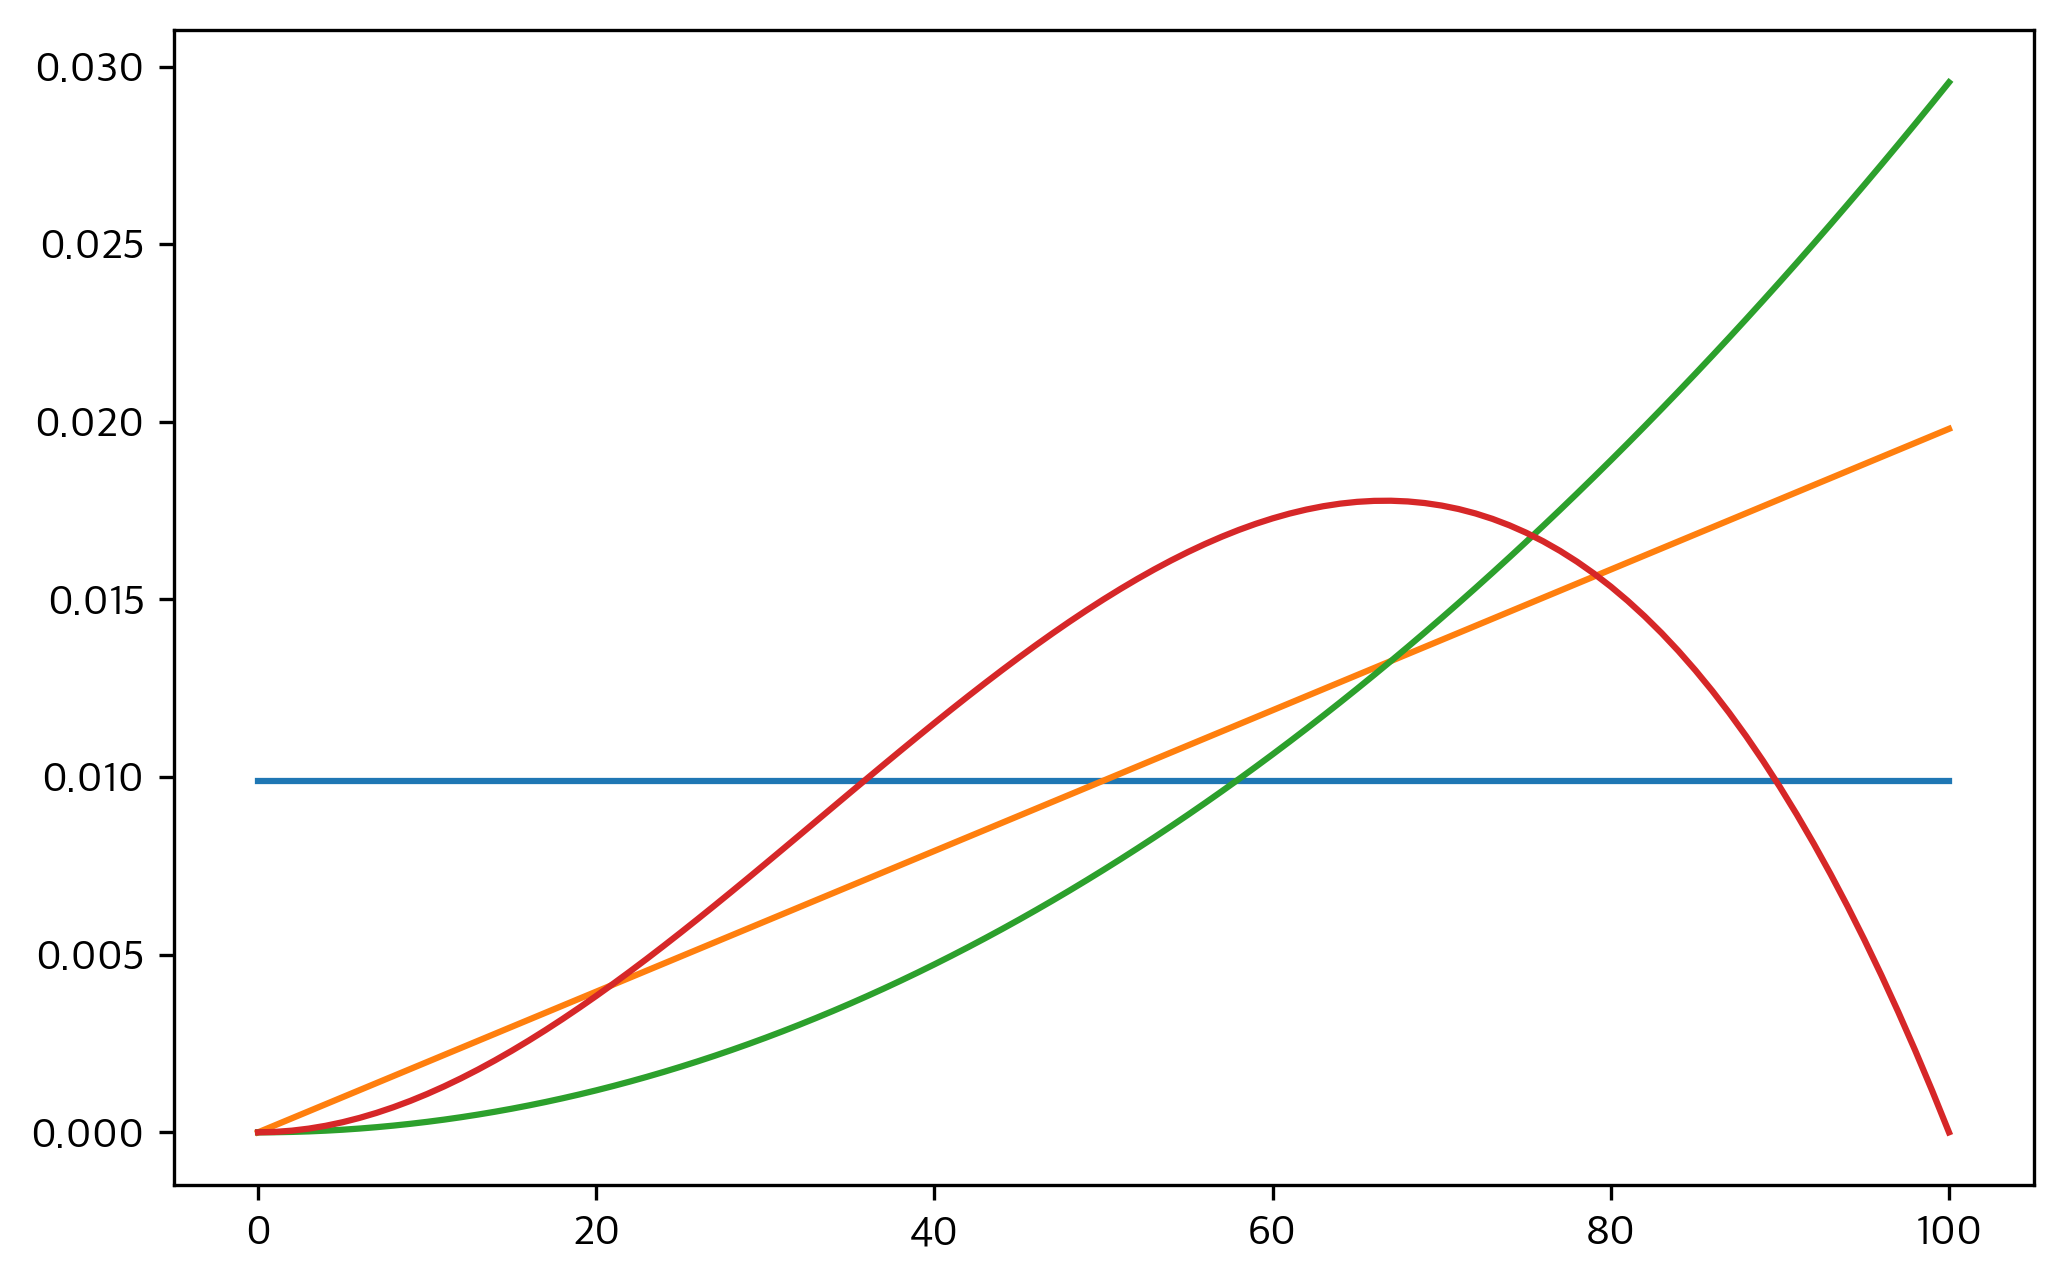

In [24]:
plt.plot(prior)
plt.plot(posterior1)
plt.plot(posterior2)
plt.plot(posterior3)

In [25]:
posterior3.max_prob()

67

In [26]:
posterior3.idxmax()

67

In [27]:
posterior3.idxmin()

0

In [28]:
posterior2.max_prob()

100

## 주사위 문제

In [29]:
hypos = [6, 8, 12]

사전분포

In [30]:
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [31]:
prior.qs

array([ 6,  8, 12])

In [32]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

랜덤하게 뽑았을 경우 1이 나왔을때 가능도

In [33]:
likelihood1 = 1/prior.qs
likelihood1

array([0.16666667, 0.125     , 0.08333333])

In [34]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


7을 뽑았을때 가능도

In [35]:
likelihood2 = 1/prior.qs
likelihood2[0] = 0 # 7이 나올 수 없음
likelihood2

array([0.        , 0.125     , 0.08333333])

In [36]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


## 주사위 업데이트

In [37]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [38]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


## 연습문제


**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7.
What is the probability that I chose the 8-sided die?

You can use the `update_dice` function or do the update yourself.

In [39]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 3)
update_dice(pmf, 5)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


**Exercise:** In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die.
But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided.
I choose a die, roll it, and get a 7.
What is the probability that I chose an 8-sided die?

Hint: To make the prior distribution, call `Pmf` with two parameters.

In [40]:
dice = Pmf([1/15, 2/15, 3/15, 4/15, 5/15], [4, 6, 8, 12, 20])
dice

,probs
4,0.066667
6,0.133333
8,0.200000
12,0.266667
20,0.333333


In [41]:
update_dice(dice, 7)
dice

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


**Exercise:** Suppose I have two sock drawers.
One contains equal numbers of black and white socks.
The other contains equal numbers of red, green, and blue socks.
Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair.
What is the probability that the socks are white?

For simplicity, let's assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [46]:
socks = Pmf.from_seq(['blackwhite', 'redgreenblue'])
likelihood = [1/2, 1/3] # 짝이 맞게 나오는 경우
socks *= likelihood
socks.normalize()
socks

,probs
blackwhite,0.6
redgreenblue,0.4


In [48]:
white = socks['blackwhite'] / 2 # blackwhite를 뽑았을 때 흰색
white

0.30000000000000004

**Exercise:** Here's a problem from [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

In [42]:
elvis = Pmf([1/3, 2/3], ['I', 'F'])
elvis

,probs
I,0.333333
F,0.666667


In [43]:
likelihood = 1, 1/2 # 형제이므로 일란성 확률 1, 이란성 확률 1/2
elvis *= likelihood
elvis.normalize()
elvis

,probs
I,0.5
F,0.5
